In [1]:
import FeatureExtract
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Test if 5 different models (for each measured Qubit one) can do better than one single one

In [2]:
df = FeatureExtract.extract_all(1000)
input_string = df['observable']
encoded_string = []
for string in input_string:
    encoded_string.append(''.join(['0' if char == 'I' else '1' for char in string]))
df['encoded_observable'] = encoded_string
df_qu0 = df[df['encoded_observable'] == '10000']
df_qu1 = df[df['encoded_observable'] == '01000']
df_qu2 = df[df['encoded_observable'] == '00100']
df_qu3 = df[df['encoded_observable'] == '00010']
df_qu4 = df[df['encoded_observable'] == '00001']


In [3]:
model = LinearRegression()
model0 = model.fit(df_qu0['noisy_expectation'].to_numpy().reshape(-1,1), df_qu0['target'])
model = LinearRegression()
model1 = model.fit(df_qu1['noisy_expectation'].to_numpy().reshape(-1,1), df_qu1['target'])
model = LinearRegression()
model2 = model.fit(df_qu2['noisy_expectation'].to_numpy().reshape(-1,1), df_qu2['target'])
model = LinearRegression()
model3 = model.fit(df_qu3['noisy_expectation'].to_numpy().reshape(-1,1), df_qu3['target'])
model = LinearRegression()
model4 = model.fit(df_qu4['noisy_expectation'].to_numpy().reshape(-1,1), df_qu4['target'])

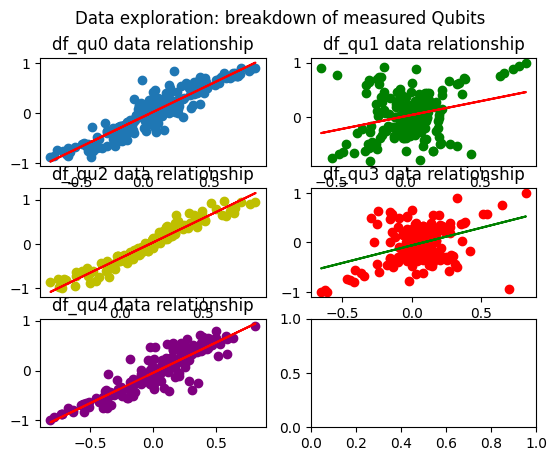

In [4]:
figure, axis = plt.subplots(3, 2)
figure.suptitle('Data exploration: breakdown of measured Qubits')

axis[0,0].scatter(df_qu0['noisy_expectation'], df_qu0['target'])
axis[0,0].plot(df_qu0['noisy_expectation'], model0.predict(df_qu0['noisy_expectation'].to_numpy().reshape(-1, 1)), color='red')
axis[0,0].set_title('df_qu0 data relationship')

axis[0, 1].scatter(df_qu1['noisy_expectation'], df_qu1['target'], color='g')
axis[0, 1].plot(df_qu1['noisy_expectation'], model1.predict(df_qu1['noisy_expectation'].to_numpy().reshape(-1, 1)), color='red')
axis[0, 1].set_title('df_qu1 data relationship')


axis[1, 0].scatter(df_qu2['noisy_expectation'], df_qu2['target'], color='y')
axis[1, 0].plot(df_qu2['noisy_expectation'], model2.predict(df_qu2['noisy_expectation'].to_numpy().reshape(-1, 1)), color='red')
axis[1, 0].set_title('df_qu2 data relationship')

axis[1, 1].scatter(df_qu3['noisy_expectation'], df_qu3['target'], color='r')
axis[1, 1].plot(df_qu3['noisy_expectation'], model3.predict(df_qu3['noisy_expectation'].to_numpy().reshape(-1, 1)), color='g')
axis[1, 1].set_title('df_qu3 data relationship')

axis[2, 0].scatter(df_qu4['noisy_expectation'], df_qu4['target'], color='purple')
axis[2, 0].plot(df_qu4['noisy_expectation'], model4.predict(df_qu4['noisy_expectation'].to_numpy().reshape(-1, 1)), color='red')
axis[2, 0].set_title('df_qu4 data relationship')
plt.show(figure)

### Plot of unmittigated error

<BarContainer object of 6 artists>

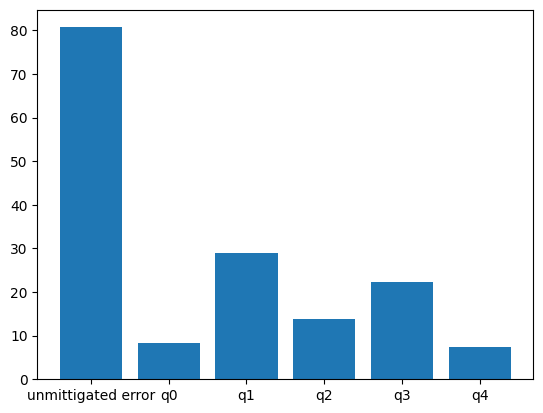

In [5]:
x = ['unmittigated error', 'q0', 'q1', 'q2', 'q3', 'q4']
height = [np.mean(np.sum((df['noisy_expectation']-df['target'])**2)),
          np.mean(np.sum((df_qu0['noisy_expectation']-df_qu0['target'])**2)),
          np.mean(np.sum((df_qu1['noisy_expectation']-df_qu1['target'])**2)),
          np.mean(np.sum((df_qu2['noisy_expectation']-df_qu2['target'])**2)),
          np.mean(np.sum((df_qu3['noisy_expectation']-df_qu3['target'])**2)),
          np.mean(np.sum((df_qu4['noisy_expectation']-df_qu4['target'])**2))]
plt.bar(x, height=height)

# Breakdown of qubits for differing observables

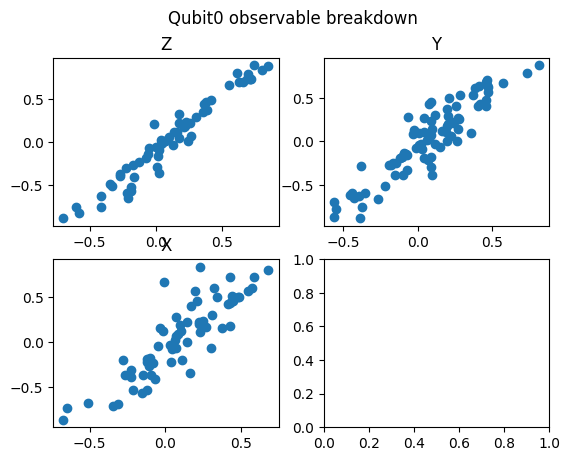

In [6]:
# for q0:
df_qu0_Z = df_qu0[df_qu0['observable'] == 'ZIIII']
df_qu0_X = df_qu0[df_qu0['observable'] == 'XIIII']
df_qu0_Y = df_qu0[df_qu0['observable'] == 'YIIII']

fig, axis = plt.subplots(2,2)
fig.suptitle('Qubit0 observable breakdown')
axis[0, 0].scatter(df_qu0_Z['noisy_expectation'], df_qu0_Z['target'])
axis[0, 0].set_title('Z')

axis[1, 0].scatter(df_qu0_X['noisy_expectation'], df_qu0_X['target'])
axis[1, 0].set_title('X')

axis[0, 1].scatter(df_qu0_Y['noisy_expectation'], df_qu0_Y['target'])
axis[0, 1].set_title('Y')
plt.show(fig)

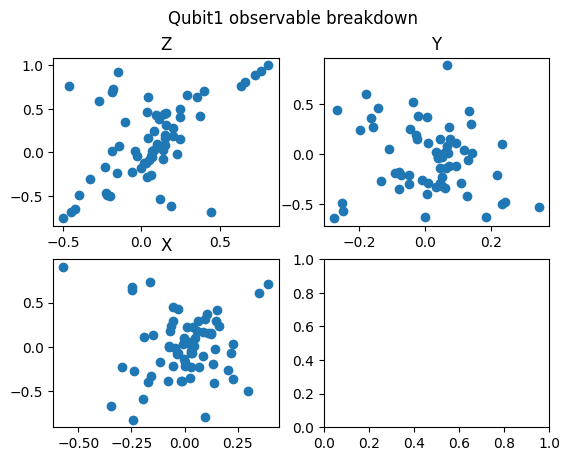

In [7]:
# for q1:
df_qu0_Z = df_qu1[df_qu1['observable'] == 'IZIII']
df_qu0_X = df_qu1[df_qu1['observable'] == 'IXIII']
df_qu0_Y = df_qu1[df_qu1['observable'] == 'IYIII']

fig1, axis1 = plt.subplots(2,2)
fig1.suptitle('Qubit1 observable breakdown')
axis1[0, 0].scatter(df_qu0_Z['noisy_expectation'], df_qu0_Z['target'])
axis1[0, 0].set_title('Z')

axis1[1, 0].scatter(df_qu0_X['noisy_expectation'], df_qu0_X['target'])
axis1[1, 0].set_title('X')

axis1[0, 1].scatter(df_qu0_Y['noisy_expectation'], df_qu0_Y['target'])
axis1[0, 1].set_title('Y')
plt.show(fig1)

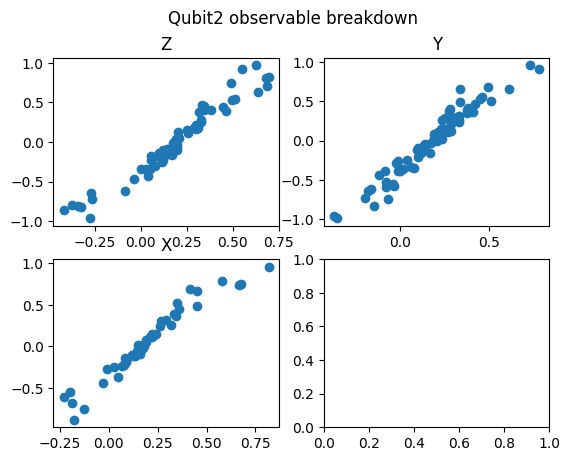

In [8]:
# for q2:
df_qu0_Z = df_qu2[df_qu2['observable'] == 'IIZII']
df_qu0_X = df_qu2[df_qu2['observable'] == 'IIXII']
df_qu0_Y = df_qu2[df_qu2['observable'] == 'IIYII']

fig1, axis1 = plt.subplots(2,2)
fig1.suptitle('Qubit2 observable breakdown')
axis1[0, 0].scatter(df_qu0_Z['noisy_expectation'], df_qu0_Z['target'])
axis1[0, 0].set_title('Z')

axis1[1, 0].scatter(df_qu0_X['noisy_expectation'], df_qu0_X['target'])
axis1[1, 0].set_title('X')

axis1[0, 1].scatter(df_qu0_Y['noisy_expectation'], df_qu0_Y['target'])
axis1[0, 1].set_title('Y')

plt.show(fig1)

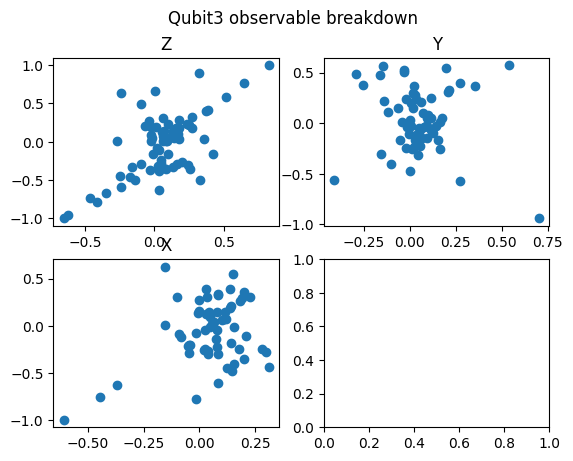

In [9]:
# for q3:
df_qu0_Z = df_qu3[df_qu3['observable'] == 'IIIZI']
df_qu0_X = df_qu3[df_qu3['observable'] == 'IIIXI']
df_qu0_Y = df_qu3[df_qu3['observable'] == 'IIIYI']

fig1, axis1 = plt.subplots(2,2)
fig1.suptitle('Qubit3 observable breakdown')
axis1[0, 0].scatter(df_qu0_Z['noisy_expectation'], df_qu0_Z['target'])
axis1[0, 0].set_title('Z')

axis1[1, 0].scatter(df_qu0_X['noisy_expectation'], df_qu0_X['target'])
axis1[1, 0].set_title('X')

axis1[0, 1].scatter(df_qu0_Y['noisy_expectation'], df_qu0_Y['target'])
axis1[0, 1].set_title('Y')
plt.show(fig1)

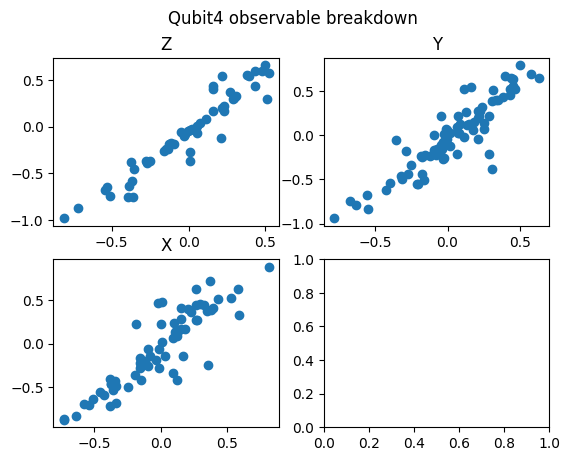

In [10]:
# for q4:
df_qu0_Z = df_qu4[df_qu4['observable'] == 'IIIIZ']
df_qu0_X = df_qu4[df_qu4['observable'] == 'IIIIX']
df_qu0_Y = df_qu4[df_qu4['observable'] == 'IIIIY']

fig1, axis1 = plt.subplots(2,2)
fig1.suptitle('Qubit4 observable breakdown')
axis1[0, 0].scatter(df_qu0_Z['noisy_expectation'], df_qu0_Z['target'])
axis1[0, 0].set_title('Z')

axis1[1, 0].scatter(df_qu0_X['noisy_expectation'], df_qu0_X['target'])
axis1[1, 0].set_title('X')

axis1[0, 1].scatter(df_qu0_Y['noisy_expectation'], df_qu0_Y['target'])
axis1[0, 1].set_title('Y')
plt.show(fig1)

# Unmittigated vs OLS mitigation

<BarContainer object of 2 artists>

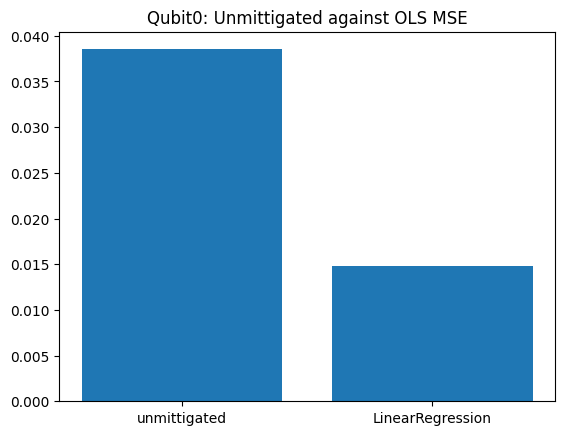

In [11]:
bar0 = mean_squared_error(df_qu0['noisy_expectation'], df_qu0['target'])
model = LinearRegression()
bar1 = FeatureExtract.KF(5, model, df_qu0.drop(columns=['encoded_observable', 'observable', 'target']).reset_index(), df_qu0['target'].reset_index())
plt.title('Qubit0: Unmittigated against OLS MSE')
plt.bar(['unmittigated', 'LinearRegression'], [bar0, bar1])


<BarContainer object of 2 artists>

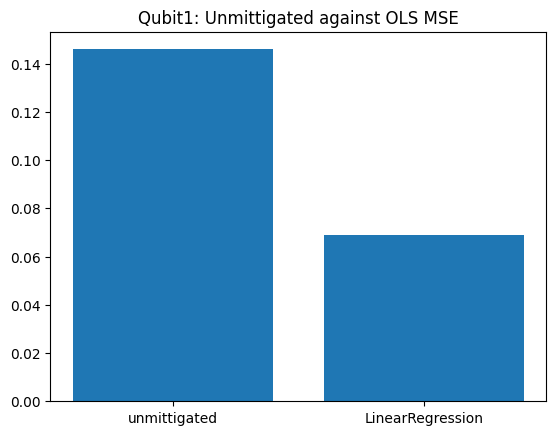

In [12]:
bar0 = mean_squared_error(df_qu1['noisy_expectation'], df_qu1['target'])
model = LinearRegression()
bar1 = FeatureExtract.KF(5, model, df_qu1.drop(columns=['encoded_observable', 'observable', 'target']).reset_index(), df_qu1['target'].reset_index())
plt.title('Qubit1: Unmittigated against OLS MSE')
plt.bar(['unmittigated', 'LinearRegression'], [bar0, bar1])

<BarContainer object of 2 artists>

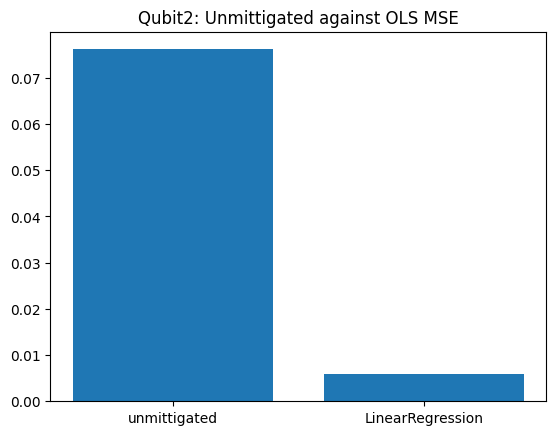

In [13]:
bar0 = mean_squared_error(df_qu2['noisy_expectation'], df_qu2['target'])
model = LinearRegression()
bar1 = FeatureExtract.KF(5, model, df_qu2.drop(columns=['encoded_observable', 'observable', 'target']).reset_index(), df_qu2['target'].reset_index())
plt.title('Qubit2: Unmittigated against OLS MSE')
plt.bar(['unmittigated', 'LinearRegression'], [bar0, bar1])

<BarContainer object of 2 artists>

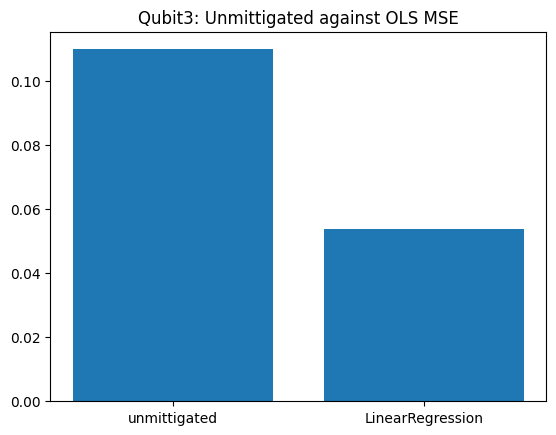

In [14]:
bar0 = mean_squared_error(df_qu3['noisy_expectation'], df_qu3['target'])
model = LinearRegression()
bar1 = FeatureExtract.KF(5, model, df_qu3.drop(columns=['encoded_observable', 'observable', 'target']).reset_index(), df_qu3['target'].reset_index())
plt.title('Qubit3: Unmittigated against OLS MSE')
plt.bar(['unmittigated', 'LinearRegression'], [bar0, bar1])

<BarContainer object of 2 artists>

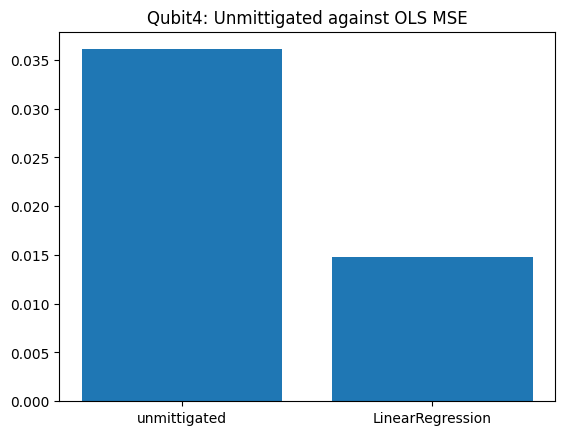

In [15]:
bar0 = mean_squared_error(df_qu4['noisy_expectation'], df_qu4['target'])
model = LinearRegression()
bar1 = FeatureExtract.KF(5, model, df_qu4.drop(columns=['encoded_observable', 'observable', 'target']).reset_index(), df_qu4['target'].reset_index())
plt.title('Qubit4: Unmittigated against OLS MSE')
plt.bar(['unmittigated', 'LinearRegression'], [bar0, bar1])

### Finally, we plot the errors of unmittigated, one model for all and 5 seperate models:

<BarContainer object of 4 artists>

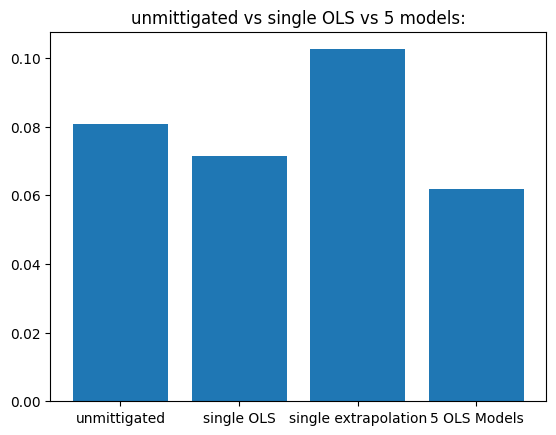

In [39]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df.drop(columns=['observable', 'target']), df['target'], test_size=0.3)
Xtrain = Xtrain.reset_index().drop(columns=['index'])
Xtest = Xtest.reset_index().drop(columns=['index'])
ytrain = ytrain.reset_index()['target']
ytest = ytest.reset_index()['target']
bar0 = mean_squared_error(df['noisy_expectation'], df['target'])
model = LinearRegression().fit(Xtrain.drop(columns=['encoded_observable']), ytrain)
bar_all = mean_squared_error(ytest, model.predict(Xtest.drop(columns=['encoded_observable'])))
df_extrapolation = FeatureExtract.extract_all_extrapolation()
bar_all_extra = mean_squared_error(df_extrapolation['target'], model.predict(df_extrapolation.drop(columns=['observable', 'target'])))

#Now for 5 different models:
Xtrain_q0 = Xtrain[Xtrain['encoded_observable'] == '10000']
Xtrain_q1 = Xtrain[Xtrain['encoded_observable'] == '01000']
Xtrain_q2 = Xtrain[Xtrain['encoded_observable'] == '00100']
Xtrain_q3 = Xtrain[Xtrain['encoded_observable'] == '00010']
Xtrain_q4 = Xtrain[Xtrain['encoded_observable'] == '00001']

ytrain_q0 = []
ytrain_q1 = []
ytrain_q2 = []
ytrain_q3 = []
ytrain_q4 = []

for i in range(len(Xtrain['encoded_observable'])):
    tmp = Xtrain['encoded_observable'][i].find('1')
    if(tmp == 0):
        ytrain_q0.append(ytrain[i])
    if(tmp == 1):
        ytrain_q1.append(ytrain[i])
    if(tmp == 2):
        ytrain_q2.append(ytrain[i])
    if(tmp == 3):
        ytrain_q3.append(ytrain[i])
    if(tmp == 4):
        ytrain_q4.append(ytrain[i])

Xtest_q0 = Xtest[Xtest['encoded_observable'] == '10000']
Xtest_q1 = Xtest[Xtest['encoded_observable'] == '01000']
Xtest_q2 = Xtest[Xtest['encoded_observable'] == '00100']
Xtest_q3 = Xtest[Xtest['encoded_observable'] == '00010']
Xtest_q4 = Xtest[Xtest['encoded_observable'] == '00001']

ytest_q0 = []
ytest_q1 = []
ytest_q2 = []
ytest_q3 = []
ytest_q4 = []

for i in range(len(Xtest['encoded_observable'])):
    tmp = Xtest['encoded_observable'][i].find('1')
    if(tmp == 0):
        ytest_q0.append(ytest[i])
    if(tmp == 1):
        ytest_q1.append(ytest[i])
    if(tmp == 2):
        ytest_q2.append(ytest[i])
    if(tmp == 3):
        ytest_q3.append(ytest[i])
    if(tmp == 4):
        ytest_q4.append(ytest[i])
    
#q0:
tmp = [(Xtrain_q0, Xtest_q0, ytrain_q0, ytest_q0), 
       (Xtrain_q1, Xtest_q1, ytrain_q1, ytest_q1),
       (Xtrain_q2, Xtest_q2, ytrain_q2, ytest_q2),
       (Xtrain_q3, Xtest_q3, ytrain_q3, ytest_q3),
       (Xtrain_q4, Xtest_q4, ytrain_q4, ytest_q4)]
mse = []
mse_extrapolation = []
for xtrain, xtest, ytrain, ytest in tmp:
    model = LinearRegression().fit(xtrain.drop(columns=['encoded_observable']), ytrain)
    mse.append(mean_squared_error(ytest, model.predict(xtest.drop(columns=['encoded_observable']))))

plt.title('unmittigated vs single OLS vs 5 models:')
plt.bar(['unmittigated', 'single OLS','single extrapolation', '5 OLS Models'],
        [bar0, bar_all, bar_all_extra, np.mean(mse)])
